In [1]:
import jieba
import jieba.analyse
import pandas as pd

### 讀取文章

In [2]:
#filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\hw1-dataset.txt"
filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\test.txt"

### 分詞

In [3]:
string = []
string1 =[]
with open(filename,'r',encoding = 'utf-8') as f:
    for line in f.readlines():
        word = jieba.lcut(line,cut_all=False)
        string.append(word)
    #將多個一維陣列合併成一個一維陣列
    for i in string :
        for w in i :
            string1.append(w)
    print(string1)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.860 seconds.
Prefix dict has been built successfully.


['為', '什麼', ' ', '聖結石', ' ', '會', '被', '酸', '而', ' ', '這群', '人', ' ', '不會', '？', '\t', '質感', ' ', '劇本', ' ', '成員', ' ', '都', '差', '很多', '好', '嗎', ' ', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '\n', '為', '什麼', '慶祝', '228', '會', '被', '罵', '可是', '慶', '端午', '不會', '？', '\t', '因為', '屈原', '不是', '台灣', '人', '，', '是', '楚國人', '。', '\n', '有', '沒', '有', '戰神', '阿瑞斯', '的', '八卦', '?', '\t', '爵士', '就是', '阿瑞斯', ' ', '男主角', '最後死', '了', '\n', '理論', '與', '實務', '最', '脫節', '的', '系', '\t', '哪個', '系', '不', '脫節', '...', '你問', '最', '不', '脫節', '的', '簡單', '多', '了', '...', '\n', '為', '什麼', 'PTT', '這麼', '多', '人', '看', '棒球', '\t', '肥宅', '才', '看', '棒球', '\u3000', '系壘', '一堆', '胖子', '\n', '為', '什麼', '達摩祖', '師傳', '那麼', '好看', '?', '\t', '達摩', '從頭', '到', '尾', '都', '是', '被動', ' ', '(', '別人問', '他', '問題', '\n', '3D', '小畫家', '有人', '會畫', '嗎', '？', '\t', '3D', '小當家', '有人', '會畫', '嗎', '\n', '對', '天龍', '人來', '說', '宜蘭', '4', '南部', '還', '４', '東部', '\t', '他國', '事務', '..', '\n', '機車', '推出', 'uber', '或', '計程', '機車會', '怎樣', '\t', '載到', '

### 移除停留詞

In [4]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue                
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
print('remove_stop_words: ',string1)

remove_stop_words:  ['為', '什麼', '聖結石', '會', '被', '酸', '而', '這群', '人', '不會', '質感', '劇本', '成員', '都', '差', '很多', '好', '嗎', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '為', '什麼', '慶祝', '會', '被', '罵', '可是', '慶', '端午', '不會', '因為', '屈原', '不是', '台灣', '人', '是', '楚國人', '。', '沒', '戰神', '阿瑞斯', '八卦', '爵士', '就是', '阿瑞斯', '男主角', '最後死', '了', '理論', '與', '實務', '最', '脫節', '系', '哪個', '系', '不', '脫節', '你問', '最', '不', '脫節', '簡單', '多', '了', '為', '什麼', 'PTT', '這麼', '多', '人', '看', '棒球', '肥宅', '才', '看', '棒球', '\u3000', '系壘', '一堆', '胖子', '為', '什麼', '達摩祖', '師傳', '那麼', '好看', '達摩', '從頭', '到', '尾', '都', '是', '被動', '(', '別人問', '他', '問題', '3D', '小畫家', '有人', '會畫', '嗎', '3D', '小當家', '有人', '會畫', '嗎', '對', '天龍', '人來', '說', '宜蘭', '4', '南部', '還', '４', '東部', '他國', '事務', '機車', '推出', 'uber', '或', '計程', '機車會', '怎樣', '載到', '肥宅會', '很', '痛苦', '台中', '龍邦', '世貿', '有人', '跳樓', '曾經', '當過', '全台', '第一', '高樓', '可惜', '不到', '一年', '抽到', '海陸會', '被', '笑', '娘', '炮兵', '嗎', '還好', '啦', '海陸下', '基地', '常態', '下好', '下滿', '。', '國', '高中', '國文', '你', '沒', '看', '

### TF-IDF權重

In [5]:
tagWordArr = []
weightArr =[]
with open(filename,'r',encoding = 'utf-8') as f:
    for line in f.readlines():
        #topK 為返回 TF-IDF 權重最大的關鍵詞(一篇文章一個topK)
        #withWeight 代表是否返回關鍵字權重值，默認為 False
        tags = jieba.analyse.extract_tags(line, topK=5, withWeight=True)
        for tag in tags:
            tagWordArr.append(tag[0])
            weightArr.append(tag[1])
print(tagWordArr)
print(weightArr)

['這群', '什麼', '聖結石', '不會', '質感', '什麼', '慶祝', '228', '不會', '因為', '阿瑞斯', '戰神', '最後死', '男主角', '爵士', '脫節', '...', '理論', '實務', '哪個', '棒球', '什麼', 'PTT', '這麼', '肥宅', '什麼', '達摩祖', '師傳', '那麼', '達摩', '3D', '會畫', '小畫家', '小當家', '有人', '天龍', '人來', '宜蘭', '東部', '他國', '機車', 'uber', '計程', '機車會', '怎樣', '龍邦', '世貿', '跳樓', '曾經', '當過', '下好', '抽到', '海陸會', '還好', '海陸下', '國文', '美國考', 'GRE', 'GMAT', '高深', '垃圾', '當初', '太陽花', '沒有', '時候', '國歌', '最難', '哪首', '中華民國', '..', '筆電', '星巴克', '帶進', '台十幾萬用', '裝的', '歐陽妮', '爸會', '妮妮', '媽媽', '愛揍', 'imgur', '浪費', '空間', '八卦', '人家', '搖搖筆', '當年', '潮物', '噱頭', '2020', '肥宅', '初夜', '還是', '打手', '多少', '006', '什麼', '打來', '電話', '國際盜', '新加坡', '何北韓', '缺電', '水電', '超貴', '甜柿', '推文', 'live', '滑速', '哪個', '轉筆', '華麗', '極致', '轉一萬次', '他們', '手式', '海鮮生', '魚片', '然後吃', '熱炸', '484', '醜的', '女生', '專業', '身為', '東西', '隨身', '攜帶', '台灣', '原住民', '運動', '人要', '台語', '貓貓', '這貓貓', '早上', '是不是', '金金', '哪裡', '音譯', '日文', '形容', '公車', '系統', '什麼', '時候', '覺得', '高醫', '大學', '比台', '醫類', '分數', '妹妹', '兩個', '問說', '共三小', '到底', '肥宅', '傳紙

In [6]:
def bubblesort(data,word):
    # 定義資料長度
    n = len(data)
    for i in range(n-2):                   # 有 n 個資料長度，但只要執行 n-1 次
        for j in range(n-i-1):             # 從第1個開始比較直到最後一個還沒到最終位置的數字 
            if data[j] < data[j+1]:        # 比大小然後互換
                data[j], data[j+1] = data[j+1], data[j]
                word[j], word[j+1] = word[j+1], word[j]

bubblesort(weightArr,tagWordArr)
print(weightArr)
print(tagWordArr)

[3.9849225009666664, 3.9849225009666664, 3.5864302508699994, 3.4156478579714284, 3.260391137154545, 3.072809934875, 2.988691875725, 2.988691875725, 2.988691875725, 2.988691875725, 2.988691875725, 2.955309027575, 2.8165463994700004, 2.7587925006692307, 2.4582479479, 2.39095350058, 2.39095350058, 2.39095350058, 2.39095350058, 2.3737337393555555, 2.34215971884, 2.234770861727273, 2.08698834984, 1.9924612504833332, 1.9924612504833332, 1.9924612504833332, 1.9924612504833332, 1.9924612504833332, 1.9924612504833332, 1.9924612504833332, 1.9858110931428572, 1.8391950004461537, 1.8391950004461537, 1.8097057278575, 1.7375847065, 1.7078239289857142, 1.7078239289857142, 1.7078239289857142, 1.7078239289857142, 1.7078239289857142, 1.5979762015880001, 1.5939690003866667, 1.546213383896, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.4943459378625, 1.494345937862

### TF-IDF長條圖 

<BarContainer object of 167 artists>

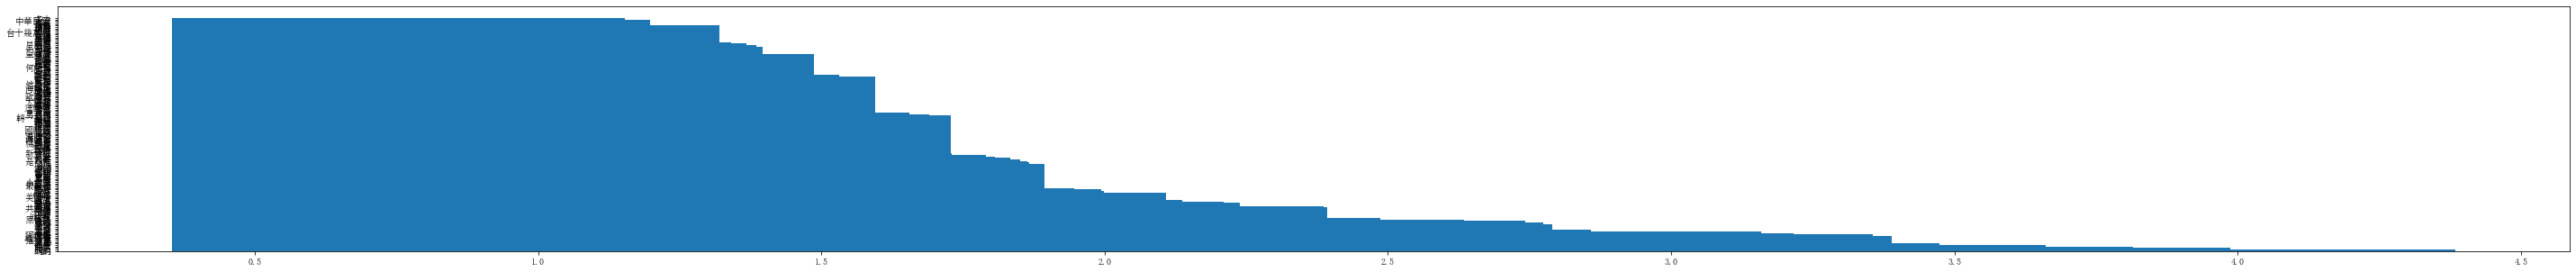

In [7]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='SimSun')
#x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(50,5))
#plt.bar(x, countArr, label = 'wordArr')
plt.bar(weightArr, tagWordArr, label = 'wordArr')

In [8]:
"""
#quick sort排序
def quick_sort(num_list: list,tagWordArr):
    # 如果要排序的列表只有一個元素或者沒有元素則直接返回
    if len(num_list) == 1 or len(num_list) == 0:
        return num_list
    temp = num_list[-1]
    temp1 = tagWordArr[-1]
    left = [],right = [] 
    left1 = [],right1 = []
    for i in range(len(num_list) - 1):
        if num_list[i] < temp:
            left.append(num_list[i])
            left1.append(tagWordArr[i])
        else:
            right.append(num_list[i])
            right1.append(tagWordArr[i])
        left = quick_sort(left,tagWordArr)
        right = quick_sort(right,tagWordArr)
    return right + [temp] + left

print("排序後的數列:", quick_sort(weightArr))
"""

'\n#quick sort排序\ndef quick_sort(num_list: list,tagWordArr):\n    # 如果要排序的列表只有一個元素或者沒有元素則直接返回\n    if len(num_list) == 1 or len(num_list) == 0:\n        return num_list\n    temp = num_list[-1]\n    temp1 = tagWordArr[-1]\n    left = [],right = [] \n    left1 = [],right1 = []\n    for i in range(len(num_list) - 1):\n        if num_list[i] < temp:\n            left.append(num_list[i])\n            left1.append(tagWordArr[i])\n        else:\n            right.append(num_list[i])\n            right1.append(tagWordArr[i])\n        left = quick_sort(left,tagWordArr)\n        right = quick_sort(right,tagWordArr)\n    return right + [temp] + left\n\nprint("排序後的數列:", quick_sort(weightArr))\n'

### 詞頻統計

In [9]:
new={}
wordArr = []
countArr =[]
#通過對程式的檢查，對程式進行完善
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    
item=list(new.items())
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)
    #print("{0:<10}{1:>5}".format(word,count))

### 頻率長條圖 

<BarContainer object of 100 artists>

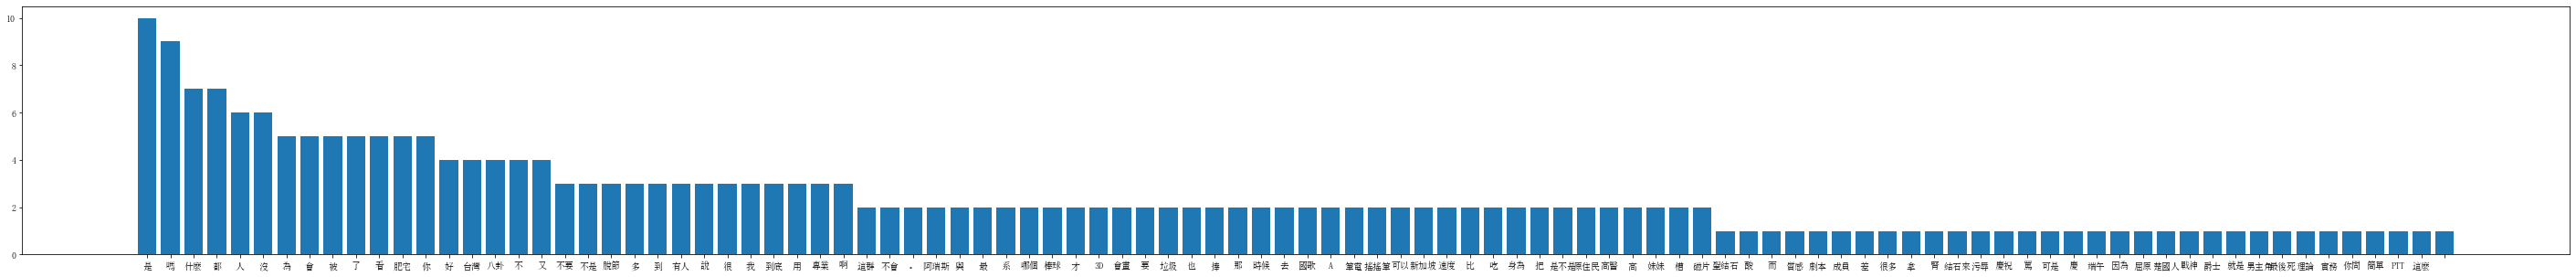

In [10]:
matplotlib.rc("font",family='SimSun')
#x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(50,5))
#plt.bar(x, countArr, label = 'wordArr')
plt.bar(wordArr, countArr, label = 'wordArr')